# <i class="fas fa-circle exercise"></i> Classification and decision boundaries
<span class="badge badge-pill badge-warning">exercise</span><span class="badge badge-pill badge-dark">notebook</span>

In this exercise you will be experimenting with linear classifiers. It is, additionally, meant to illustrate the fundamentals of classification, and visualization of decision boundaries.


In [2]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core
import seaborn as sns  # higher level plotting tools
%matplotlib inline
sns.set()


## Linear Decision boundary


### Generating data points
In the following section you will be experimenting with a standard linear classifier, eg. $\mathbf{y} = sgn(\mathbf{\theta}^\top\mathbf{x})$, where $\theta$ is the model parameters.

The cell below generates random data to be used for classification. You do not have to know the details of how the data is generatedata, as it is not the focus of the excersise. However, if you must know, here is a link to [the documentation](https://numpy.org/devdocs/reference/random/generated/numpy.random.multivariate_normal.html) of numpy's random.multivariate_normal.


In [122]:
np.random.seed(42)## generate the same sequence of random points
# Generate 2 clusters of data, by drawing from a normal distribution.
S = np.eye(2) ## covariance matrix, set to indenty matrix i.e. x,y independent. 
p1 = np.random.multivariate_normal([1,1], S, 40)
p2 = np.random.multivariate_normal([-1,-1], S, 40)
## 40 points (x,y) coordinates
p1.shape


(40, 2)

The data of the two classes are stored in the variables `p1` and `p2`, respectively
\
The next cell will visualize the two classes. 


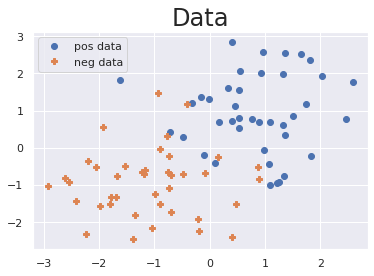

In [125]:
fig, ax = plt.subplots()
ax.plot(p1[:,0],p1[:,1], "o", label='pos data' )
ax.plot(p2[:,0],p2[:,1], "P", label='neg data')
plt.title("Data", fontsize=24)
plt.legend();


The next step is to manually experiment with model parameters of the linear classifier and visualize the results.

### Task (A)
 <i class="fas fa-code"></i> Implement a `linear_boundary` that, given an x-coordinate and the model parameters, return the y-value of a straight line.
    \
    $y = ax + b$


In [61]:
def linear_boundary(x,params):
    """
    :param x: x values of the line.
    :param params: List of parameters [bias, slope] of the line.
    
    :return: y-values of the boundary / line .
    """
    # Write solutions here


<i class="fas fa-code"></i> Use the function `linear_boundary` to generate the points of the decision boundary (line) given your own choice of parameters (as input).
    
<i class="fas fa-question"></i> Which choice of parameters seem (visually) to best seperate the two classes? 
   


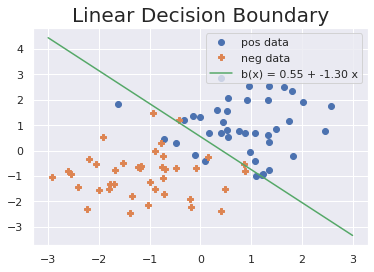

In [126]:
# plotting the 
fig, ax = plt.subplots()
ax.plot(p1[:,0],p1[:,1], "o", label='pos data' )
ax.plot(p2[:,0],p2[:,1], "P", label='neg data')
# Write solutions here


<i class="fas fa-code"></i> Implement the function `prediction` that predict the `class` (if the point belongs to the `neg` or `pos`) of a point based on the decision line. 
\
<i class="fas fa-code"></i>  Next, use `prediction` to make the function `fraction_correct` that compare the _predicted class_ to the _actual class_ of given data points. The function should return the fraction of $\frac{\#Correct}{\#All Points}$.
\
<i class="fas fa-question"></i> Which values of the parameters provide the largest fraction of correct predictions


In [138]:
def prediction(decision_function,params,p):
    """
    :param decision_function:Obejct used to create the decision boundary (here linear_boundary) 
    :param params: parameters of you decision function.
    :param p: The point [x,y] to predict
    
    :return: 0 if neg class / 1 if pos class.
    """
    # Write solutions here
def fraction_correct(decision_function,params,data):
    """
    :param decision_function: Obejct used to create the decision boundary
    :param params, Parameters of you decision function.
    :param data: List containing the two classes of data [pos data, neg data]
    
    :return: fraction of correctly predicted points (num_correct/num_points).
    """
    # Write solutions here


0.9


<i class="fas fa-question"></i> Is a linear decision boundary a good model to seperate the two groups of data? 


## Non-linear decision boundary

In the following section you will be experimenting with a slightly more exotic set of data,
and explore whether a straight line can still be used for accurate classification.

The cell below generates two classes of random data to be used for classification.


In [192]:
### Data generation
q1 = np.random.multivariate_normal([0,0], [[.5,0],[0,.5]] , 400)

t = np.linspace(0,2*np.pi,400) ##  
q2 = np.array([(3+q1[:,0])*np.sin(t), (3+q1[:,1])*np.cos(t)]).T


(400, 2)


The data of the two classes (`class 1` and `class 2`) are stored in the variables `q1` and `q2`, respectively
\
The following cell will visualize the data of the two classes. 


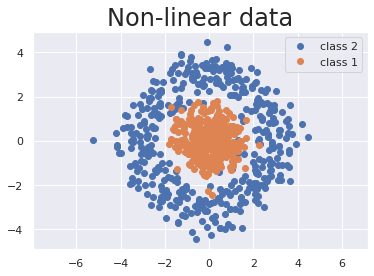

In [170]:
###
fig, ax = plt.subplots()
ax.plot(q2[:,0], q2[:,1], "o",label='class 2')
ax.plot(q1[:,0], q1[:,1], "o",label='class 1')


plt.title("Non-linear data", fontsize=24)
ax.axis('equal')
plt.legend()
plt.show()


### Task (B)
<i class="fas fa-question"></i>  What is the best accuracy you can achieve if you attempt to predict the class of the data with a straight line? (Use your implementation from `Task (A)`)
\
<i class="fas fa-code"></i>  Use the parametric equation of a circle ([described in detail here](https://mathopenref.com/coordparamcircle.html))
    \
    $ x = a\sin(t)$
    \
    $ y = a\cos(t)$
   \
    to create `circle_boundary` that given `t` (array of angles) and the radius as input, return the x and y-value of the circle.
    
   __Hint__: Use the already provided linspace `t`  to plot a circular boundary.


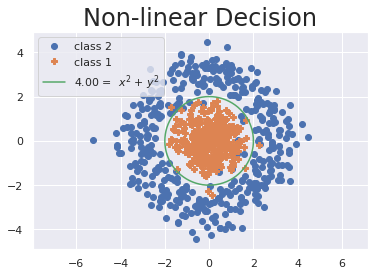

In [185]:
t = np.linspace(0,2*np.pi,400) ### create 400 points in the range 0 ->2*pi (angles in radian units) 

def circle_boundary(t,radius):
    """
    :param t: angle data points of the circle. 
    :param radius: radius of the circle
    :return: (x-values,y-values) of the circle points .
    """
    # Write solutions here

fig, ax = plt.subplots()
ax.plot(q2[:,0], q2[:,1], "o",label='class 2')
ax.plot(q1[:,0],q1[:,1], "P",label='class 1')

# plot the circle
########
#your code
########


<i class="fas fa-question"></i> Which choice of radius seem (visually) to best separate the two classes.  
<i class="fas fa-question"></i> Could the decision boundary from above be learned by a linear model? __Remember__: A Linear model in machine learning refer to linear in the parameters. 
\
<i class="fas fa-code"></i> (optional) Implement a method like in the `Task (A)` that provides the fraction of points correctly separated by the decision boundary.
_hint_: Can actually be done easily if your predict based on if $x^2+y^2$ is $>r^2$ or $<r^2$


In [190]:
########
#your code
########



A circular decision boundary with radius: 2, has an accuracy of: 0.981


## Batman (optional, but fun!)

In this last section, we will look at ulabeled data and predict the `class` of each point by implementing a specific decision boundary.
\
The cell below generates uniformly distributed random data, but unlabeled this time (i.e. we do not have two groups of data this time). 


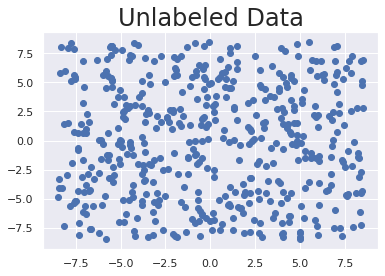

In [177]:
# Generate (uniformly distrubuted data)
X = np.random.uniform(-8.5,8.5,(500,2))


The unlabeled data is stored in the variable `X`.

The data is visualized in the cell below. 


In [ ]:
## plotting the data
fig, ax = plt.subplots()
ax.plot(X[:,0],X[:,1], "o", label='Unlabeled data' )

plt.title("Unlabeled Data", fontsize=24)
plt.show()


### Equation: batman logo
An equtation for the batman logo is given by the following horrifying piecewise equation.

Upper part of the logo: 

\begin{equation*}
y = \left\{
        \begin{array}{ll}
            2\cdot\sqrt{-\frac{(||x|-1|)\cdot|3-|x||}{((|x|-1)\cdot(3-|x|))}}\cdot\frac{1+||x|-3|}{(|x|-3)}𝑦𝑦\cdot\sqrt{1-(x/7)^2}+(5+0.97\cdot(|x-0.5|+|x+0.5|)-3\cdot(|x-0.75)|+|x+0.75|))\cdot(1+|1-|x||/(1-|x|))
 & \quad x\in[-7,-3) \cup (-1,1) \cup (3,7]   \\
            (2.71052+(1.5-0.5\cdot|x|)-1.35526\cdot\sqrt{4-(|x|-1)^2})\cdot\sqrt{(||x|-1|)/(|x|-1)}+0.9 & \quad x \in [-3,-1) \cup (1,3] 
        \end{array}
    \right.
\end{equation*}

Lower part of the logo:
\begin{equation*}
y = \left\{
        \begin{array}{ll}
            -3\cdot\sqrt{1-(x/7)^2}\cdot\sqrt{||x|-4|/(|x|-4)} & \quad x \in (-7,-4)\cup (4,7) \\
            |x/2|-0.0913722\cdot(x^2)-3+\sqrt{1-(||x|-2|-1)^2} & \quad x \in [-4,4]
        \end{array}
    \right.
\end{equation*}

We are not so evil as to require that you type in the equations yourself, in the cells below you have to use the 4 provide equations (each defined on a specific interval) to 
construct a decision boundary. 


### Task (D) 
<i class="fas fa-code"></i>  Use the 2 equations for upper part of the logo to implement `batman_up` that provided an x-value return the corresponding y-value of the upper logo boundary. If $|x|>7$ the functions should return `nan`. 
\
<i class="fas fa-code"></i>  Use the 2 equations for lower part of the logo to implement`batman_low` that provided an x-value return the corresponding y-value of the lower logo boundary. Again, if $|x|>7$ the functions should return `nan`. 
\
<i class="fas fa-code"></i> Use the `batman_up` and `batman_low` to plot the batman logo. _Hint_: Use list comprehension.


In [178]:
#Use the 4 equations in the interval they are defined on.
"""
##upper part
### interval [-7:-3), (-1:1) and (3:7] 
eq1 = 2*np.sqrt(-abs(abs(x)-1)*abs(3-abs(x))/((abs(x)-1)*(3-abs(x))))*(1+abs(abs(x)-3)/(abs(x)-3))*np.sqrt(1-(x/7)**2)+(5+0.97*(abs(x-0.5)+abs(x+0.5))-3*(abs(x-0.75)+abs(x+0.75)))*(1+abs(1-abs(x))/(1-abs(x)))
### interval [-3,-1) and (1,3]
eq2 = (2.71052+(1.5-0.5*abs(x))-1.35526*np.sqrt(4-(abs(x)-1)**2))*np.sqrt(abs(abs(x)-1)/(abs(x)-1))+0.9

##lower part
### interval (-7:-4[ and ]4:7[
eq3 = -3*np.sqrt(1-(x/7)**2)*np.sqrt(abs(abs(x)-4)/(abs(x)-4))
## interval [-4:4]
eq4 = abs(x/2)-0.0913722*(x**2)-3+np.sqrt(1-(abs(abs(x)-2)-1)**2)
"""
print()


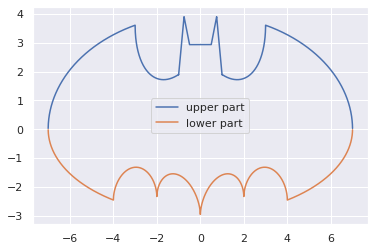

In [134]:
def batman_up(x):
    """
    The function takes a single x-value and return y-value that would place the point (x,y) on the upper 
    line of the batman logo.
    
    :param x: single x-value.
    :return:  y-value of the upper line of the batmon logo
    """
    return None # Replace
    
def batman_low(x):
    """
    The function takes a single x-value and return y-value that would place the point (x,y) on the lower 
    line of the batman logo.
    
    :param x: single x-value.
    :return:  y-value of the lower line of the batmon logo
    """
    return None # Replace
    
### Plot the logo
x_plot = np.linspace(-7.2,7.2,10000) ### a lot of x-values

#Your code here



<i class="fas fa-code"></i> Next, use `batman_low` and `batman_up` to classify whether the points are inside the logo or outside the logo.
\
<i class="fas fa-code"></i>  Plot the classified points, make the points outside black and the ones inside the boundary yellow. 


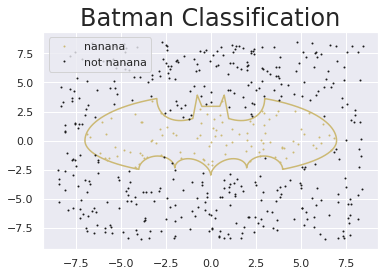

In [89]:

###############
#Your code here
###############


<i class="fas fa-code"></i> (FOR FUN) Generate $100000$ unlabeled points instead and repeat step 2 again. 


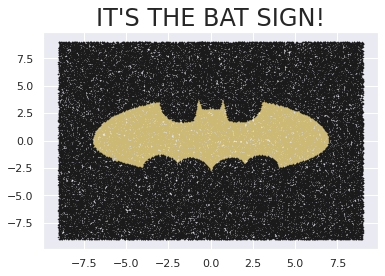

In [133]:
###############
#Your code here
###############


This last example is meant to showcase that a there is no real limit for how complex a decision boundary can be. If the model is large (parameter-wise) and complex enough, any seqmentation of the feature space is possible. 

However, an overly complex model is not a good thing as you will soon discover (next week). 

## BONUS INFO

What we have done here in the last TASK is actually an ACCEPT/REJECT Monte Carlo sampling. [You can read a bit about Monte Carlo sampling here](https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/lectures/lecture17.pdf)
